---
title: "NBA 2023-24 Analysis"
author:
  - name: Sangkon Han
    orcid: 0000-0002-0760-5497
    corresponding: true
    email: sangkon@pusan.ac.kr
    roles:
      - Software
      - Visualization
keywords:
  - NBA
  - 선형모델
abstract: |
  NBA 2023-24 시즌 데이터는 총 300개의 행과 31개의 열로 구성된 데이터셋으로, 각 팀의 시즌 기록과 관련된 다양한 통계 정보를 제공합니다. 주요 변수로는 시즌(Season), 팀명(Team), 승리(W), 패배(L), 순위(Finish), 평균 연령(Age), 평균 키(Ht.), 평균 몸무게(Wt.) 등이 있으며, 경기 수(G), 출전 시간(MP), 야투(FG, FGA, FG%), 3점슛(3P, 3PA, 3P%), 2점슛(2P, 2PA, 2P%), 자유투(FT, FTA, FT%), 공격 리바운드(ORB), 수비 리바운드(DRB), 총 리바운드(TRB), 어시스트(AST), 스틸(STL), 블록(BLK), 턴오버(TOV), 파울(PF), 득점(PTS) 등이 포함됩니다. 이 데이터는 시즌별 팀 성과 분석, 선수들의 경기력 비교, 주요 경기 지표의 상관관계 분석 등을 수행하는 데 유용합니다[@knuth84].
date: last-modified
echo: true

---

## Loading Datasets

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 8)

NBA 2023-24 시즌 데이터는 총 300개의 행과 31개의 열로 구성된 데이터셋으로, 각 팀의 시즌 기록과 관련된 다양한 통계 정보를 제공합니다. 주요 변수로는 시즌(Season), 팀명(Team), 승리(W), 패배(L), 순위(Finish), 평균 연령(Age), 평균 키(Ht.), 평균 몸무게(Wt.) 등이 있으며, 경기 수(G), 출전 시간(MP), 야투(FG, FGA, FG%), 3점슛(3P, 3PA, 3P%), 2점슛(2P, 2PA, 2P%), 자유투(FT, FTA, FT%), 공격 리바운드(ORB), 수비 리바운드(DRB), 총 리바운드(TRB), 어시스트(AST), 스틸(STL), 블록(BLK), 턴오버(TOV), 파울(PF), 득점(PTS) 등이 포함됩니다. 이 데이터는 시즌별 팀 성과 분석, 선수들의 경기력 비교, 주요 경기 지표의 상관관계 분석 등을 수행하는 데 유용합니다[@knuth84].

In [16]:
nba = pd.read_csv("NBA_2023-24.csv")
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  300 non-null    object 
 1   Team    300 non-null    object 
 2   W       300 non-null    int64  
 3   L       300 non-null    int64  
 4   Finish  300 non-null    int64  
 5   Age     300 non-null    float64
 6   Ht.     300 non-null    object 
 7   Wt.     300 non-null    int64  
 8   G       300 non-null    int64  
 9   MP      300 non-null    int64  
 10  FG      300 non-null    int64  
 11  FGA     300 non-null    int64  
 12  FG%     300 non-null    float64
 13  3P      300 non-null    int64  
 14  3PA     300 non-null    int64  
 15  3P%     300 non-null    float64
 16  2P      300 non-null    int64  
 17  2PA     300 non-null    int64  
 18  2P%     300 non-null    float64
 19  FT      300 non-null    int64  
 20  FTA     300 non-null    int64  
 21  FT%     300 non-null    float64
 22  OR

`NBA.head()`는 데이터프레임의 상위 5개 행을 미리보기 형태로 보여주는 함수로, 데이터의 구조와 내용을 빠르게 파악할 수 있도록 도와줍니다. 이를 통해 각 열(컬럼)의 데이터 유형, 예시 값, 범위 등을 확인할 수 있어 데이터 전처리 및 분석 계획을 수립하는 데 유용합니다. 예를 들어, NBA 2023-24 시즌 데이터의 경우, NBA.head()를 통해 팀명(Team), 시즌(Season), 승리(W), 패배(L) 등 주요 지표의 초기 데이터를 확인할 수 있으며, 데이터의 이상치나 결측치의 존재 여부를 빠르게 파악할 수 있습니다.

In [17]:
nba.head()

,Season,Team,W,L,...,BLK,TOV,PF,PTS
0,2023-24,Atlanta Hawks,36,46,...,369,1110,1522,9703
1,2022-23,Atlanta Hawks,41,41,...,401,1060,1541,9711
2,2021-22,Atlanta Hawks,43,39,...,348,972,1534,9343
3,2020-21,Atlanta Hawks,41,31,...,342,953,1392,8186
4,2019-20,Atlanta Hawks,20,47,...,341,1086,1548,7488


## Linear Regression feature selection

> Feature Selection은 선형 회귀(Linear Regression) 모델의 성능을 향상시키기 위해 중요한 변수를 선택하고 불필요한 변수를 제거하는 과정입니다. 올바른 특성(Feature)을 선택하면 모델의 복잡도를 줄이고, 과적합(Overfitting)을 방지하며, 해석 가능한 모델을 만들 수 있습니다. 

종속 변수(W, 승리 수)에 가장 큰 영향을 미치는 독립 변수(Feature) 5개를 선택하도록 하겠습니다.

- SelectKBest: 피처 선택을 위해 사용되는 함수로, 가장 중요한 K개의 피처를 선택합니다.
    - score_func=f_regression: f_regression 함수를 사용하여 각 독립 변수와 종속 변수(y) 간의 통계적 관계(선형 회귀)를 측정합니다.
    - k=5: 가장 중요한 5개의 피처를 선택하라는 의미입니다.
- f_regression은 피처의 F-값을 계산하고, p-값을 바탕으로 중요한 피처를 결정합니다.

In [ ]:
X = nba.drop(["Season", "Team", "W", "Ht."], axis=1)
y = nba["W"]

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression
features = SelectKBest(score_func=f_regression, k=5)
features.fit(X, y)
selectedFeatures = X.columns[features.get_support()]

In [20]:
X = nba[selectedFeatures]
y = nba["W"]

## Performing the train, test, split-linear regression style

> 데이터를 훈련 세트와 테스트 세트로 분할합니다.

이 코드는 X, y 데이터를 훈련 세트(80%)와 테스트 세트(20%)로 분할합니다. 훈련 세트는 모델 학습에 사용되며, 테스트 세트는 모델 성능을 평가하는 데 사용됩니다. random_state=42는 데이터의 재현성을 보장하기 위해 사용됩니다. 이 코드는 머신러닝 모델을 학습하고 평가할 때 필수적인 절차입니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

## Making the model

LinearRegression()을 사용하여 선형 회귀 모델을 생성하고, fit() 메서드로 훈련 데이터(X_train, y_train)를 사용해 모델을 학습합니다. 각 피처의 회귀 계수를 확인하면, 특성이 종속 변수(W)와 어떻게 관계가 있는지 해석할 수 있습니다. 절편(Intercept)도 함께 출력되어, 독립 변수가 0일 때 종속 변수가 갖는 기본값을 알 수 있습니다. $R^2$스코어는 모델의 설명력을 나타내며, 1에 가까울수록 더 좋은 모델입니다. MSE (평균 제곱 오차)는 예측값과 실제값 간의 차이의 제곱합을 평균한 값으로, 작을수록 더 좋은 모델입니다.

In [22]:
from sklearn.linear_model import LinearRegression
nba_model = LinearRegression()
nba_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_predictions = nba_model.predict(X_test)
y_predictions

array([24.7743466 , 45.07294498, 55.02968247, 57.74842782, 57.1520216 ,
       50.95072228, 30.23293152, 54.65468128, 27.59435315, 32.89768513,
       21.76897972, 53.2773989 , 31.15039269, 22.65035576, 37.48095445,
       53.19758145, 32.06329958, 28.19597675, 43.59553105, 58.5635895 ,
       30.604084  , 39.66243894, 49.10548945, 40.52661603, 52.26575229,
       44.73626208, 32.72735547, 32.1790696 , 37.54137081, 22.15529642,
       53.85378355, 61.96208648, 35.77551939, 42.4319417 , 40.60806046,
       37.04052241, 45.49911597, 39.77779156, 24.15053368, 53.5521565 ,
       41.2798195 , 39.3270993 , 46.59151032, 48.03243751, 36.85342386,
       48.55913468, 36.68835153, 18.22255011, 31.50257529, 47.44562655,
       42.8108434 , 38.18889155, 35.49265951, 53.07278349, 48.37935041,
       53.4662262 , 62.10579586, 52.44909605, 32.22103838, 41.7442117 ])

## Finding the coefficients and intercepts of the regression model equation

In [24]:
nba_model.coef_

array([ -0.43165159,  -1.41415591,   0.56853489,  41.70619907,
       -33.69559578])

In [25]:
nba_model.intercept_

np.float64(46.22288627744338)

## Evaluating model's accuracy

In [26]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,y_predictions)

np.float64(0.07435717467549478)

## Viewing results of predictions on a scatterplot

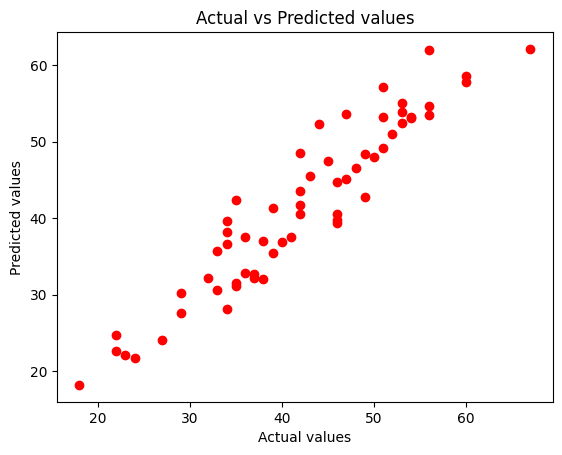

In [27]:
#| label: fig-predicted
#| fig-cap: Actual vs Predicted
#| fig-alt: Prediction result

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predictions, color="red")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()